In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


--- Random Forest ---
Default Accuracy: 0.9653179190751445
Tuned Accuracy: 0.9739884393063584
Best Parameters: {'max_depth': None, 'n_estimators': 100}


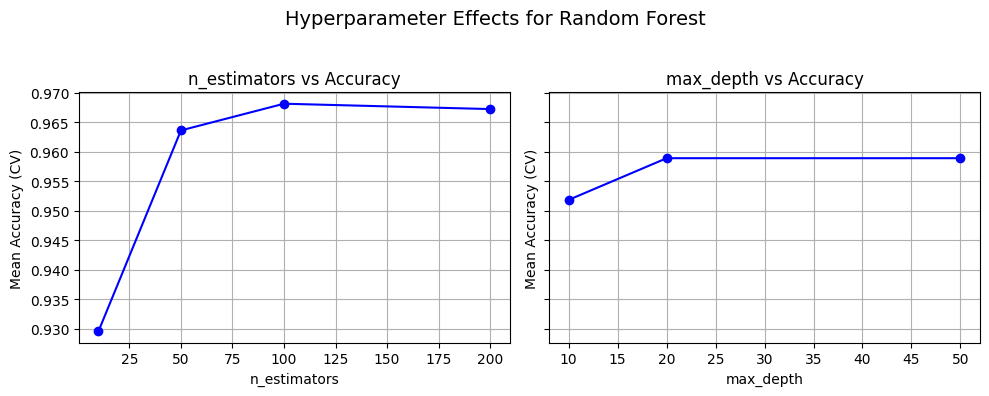


--- SVC ---
Default Accuracy: 0.9132947976878613
Tuned Accuracy: 0.9884393063583815
Best Parameters: {'C': 50.0, 'gamma': 'scale', 'kernel': 'rbf'}


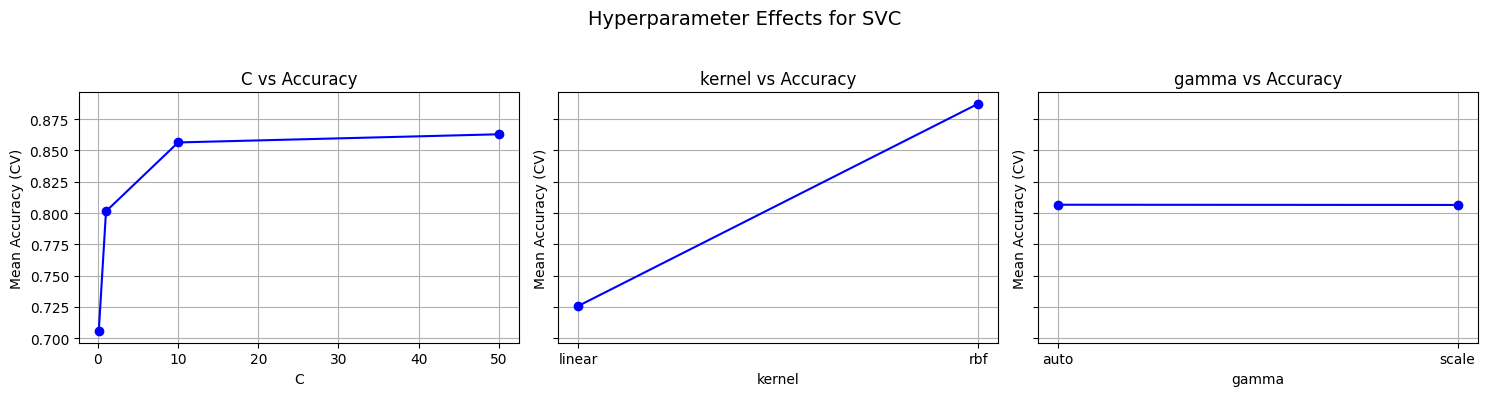


--- K-Nearest Neighbors ---
Default Accuracy: 0.8872832369942196
Tuned Accuracy: 0.8872832369942196
Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}


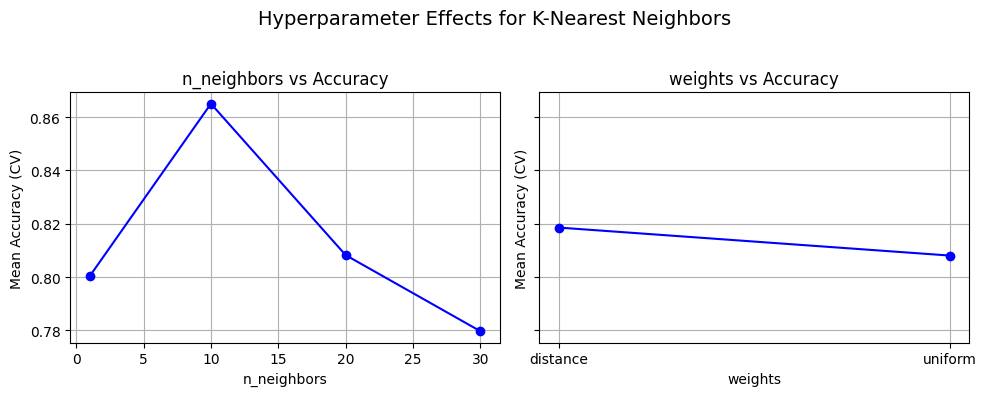

In [3]:

# Load the dataset
filepath = "car.data"
data = pd.read_csv(filepath, header=None)
# Encode categorical variables
encoder = LabelEncoder()
for column in data.columns:
    data[column] = encoder.fit_transform(data[column])
# Split data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Function to perform tuning, training, and plotting for a model
def tune_and_plot(model, param_grid, model_name):
    print(f"\n--- {model_name} ---")
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Best parameters and best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate the default model and tuned model
    model_default = model.__class__()  # Create a default instance of the model
    model_default.fit(X_train, y_train)
    default_pred = model_default.predict(X_test)
    tuned_pred = best_model.predict(X_test)
    # Calculate metrics
    default_accuracy = accuracy_score(y_test, default_pred)
    tuned_accuracy = accuracy_score(y_test, tuned_pred)
    print("Default Accuracy:", default_accuracy)
    print("Tuned Accuracy:", tuned_accuracy)
    print("Best Parameters:", best_params)
    # Plotting hyperparameter effects
    results = pd.DataFrame(grid_search.cv_results_)
    fig, axes = plt.subplots(1, len(param_grid), figsize=(len(param_grid) * 5, 4), sharey=True)
    for i, param in enumerate(param_grid):
        # Extract valid parameter values and their mean test scores
        param_values = results[f"param_{param}"].unique()
        mean_scores = results.groupby(f"param_{param}")["mean_test_score"].mean()
        # Align param_values with mean_scores to ensure matching lengths
        aligned_param_values = mean_scores.index  # These are the actual parameter values in the results
        aligned_mean_scores = mean_scores.values  # Corresponding scores
        # Plot each parameter's effect on accuracy
        axes[i].plot(aligned_param_values, aligned_mean_scores, marker="o", color="blue")
        axes[i].set_title(f"{param} vs Accuracy", fontsize=12)
        axes[i].set_xlabel(param, fontsize=10)
        axes[i].set_ylabel("Mean Accuracy (CV)", fontsize=10)
        axes[i].grid(True)
    plt.suptitle(f"Hyperparameter Effects for {model_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
# Define models and their hyperparameter grids
models_and_grids = [
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [10,50, 100, 200],
            "max_depth": [None, 10, 20,50],
        },
    },
    {
        "name": "SVC",
        "model": SVC(),
        "param_grid": {
            "C": [0.1, 1.0, 10.0,50.0],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"],
        },
    },
    {
        "name": "K-Nearest Neighbors",
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors":  [1,10,20, 30],  # Adjusted for fewer, evenly spaced points
            "weights": ["uniform", "distance"],
        },
    },
]
# Loop through models and perform hyperparameter tuning and plotting
for entry in models_and_grids:
    tune_and_plot(entry["model"], entry["param_grid"], entry["name"])
 

